<center> <h1><b> NLP ( Natural Language Processing ) </b></h1> </center>

---

# <a id='toc1_'></a>[`Table of contents:`](#toc0_)
- Definition
- NLTK vs SpaCy
- Basic Terms
- Understanding of Text Analysis
- Tokenization
  - Types of Tokenization
    - Word Tokenizer
    - Sentence Tokenizer
    - Wordpunct Tokenizer
    - TreebankWord Tokenizer
    - Tweet Tokenizer
    - Custom Tokenizer
      - Whitespace Tokenizer
      - Delimeter Tokenizer using regular expressions
- Normalization
  - Techniques of Normalization
    - Stemming
      - Types of Stemming
        - PorterStemmer
        - SnowballStemmer
        - RegexpStemmer
        - LancasterStemmer
    - Lemmatization
- Stopwords
- POS Tags
  - pos_tag
  - pos_tag_sent
- Names Entity Recognition

---

`DEFINITION`:
NLTK (Natural Language Toolkit) is a Python library for working with human language data, offering tools for tasks like tokenization, stemming, tagging, parsing, and more. Its current version, as of my last update, is NLTK 3.8.1.

In [3]:
import nltk

In [4]:
nltk.__version__

'3.8.1'

## <a id='toc1_1_'></a>[` Differences between NLTK vs SpaCy`](#toc0_)

| Feature               | NLTK                                             | SpaCy                                            |
|-----------------------|--------------------------------------------------|--------------------------------------------------|
| Language Support      | Supports multiple languages.                     | Supports multiple languages.                     |
| Performance           | Slower processing speed.                          | Faster processing speed.                         |
| Ease of Use           | Simple interface, but may require more coding.   | More complex interface, but easier to use.       |
| Tokenization          | Basic tokenization functionalities.              | Advanced tokenization with context awareness.    |
| POS Tagging           | Basic Part-of-Speech tagging capabilities.       | Advanced POS tagging with deep learning models. |
| Dependency Parsing    | Limited dependency parsing capabilities.         | Accurate and efficient dependency parsing.      |
| Named Entity Recognition (NER) | Basic NER capabilities.                   | Advanced NER with pre-trained models.           |
| Entity Linking        | Not supported.                                   | Supported for resolving entities to knowledge bases. |
| Active Development    | Less active development community.               | Active development with regular updates.        |


## <a id='toc1_2_'></a>[`Basics terms:`](#toc0_)

---

`Corpus:` collection of text documents(tweets,comments)<br>

`Tokens:` smaller units of a text(words, phrases, ngrams)<br>

`Ngrams:` combination of N words / characters together.<br>

Ex: Sentence: I LOVE MY PHONE
  
- Unigrams(n=1) : I, Love, My, Phone.<br>
- Bigrams(n=2): I Love, Love My, My Phone.<br>
- trigrams(n=3): I Love my, Love My Phone.<br>

---

Corpus > Documents > Paragraphs > Sentences > words

---
simply, we can remember as

1. Corpus -> paragraphs

2. Documents -> sentences

3. vocabulary -> unique words in the sentences

---
`Encoding standard:`
- Each character has a unique representation code on computers
- ASCII (American Standard Code for Information Interchange) was widely popular standard that mostly encodes all English characters
- The Unicode standard helps represnt text in almost all the languages of the world
  - `UTF-16`: Encodes each character with a 16-bit code
  - `UTF-8`: Encodes each English character with an 8-bit code and each non-english character with a 32-bit code.   
- `UTF-8`:
  - English character store in 8 bit size.  --> advantage of UTF-8.
  - But, when it comes to symbols. it takes 24 bit size --> disadvantage of UTF-8
- `UTF-16`:
  - English character store in 16 bit size --> waste of memory --> disadvantage of UTF-16.
  - But, when it comes to symbols. it takes 16 bits which is much lesser than UTF-8 --> advantage of UTF-16.

---





## <a id='toc1_3_'></a>[`Corpus` -> Paragraphs](#toc0_)

---

"My name is satwik, i have interest in learning ML, NLP, and DL. I am also a data enthusiastic".

In [5]:
corpus = """My name is satwik, i have interest in learning ML, NLP, and DL.
I am also a "data enthusiastic".
Welcome to sathvi's world."""

corpus # printing the corpus

'My name is satwik, i have interest in learning ML, NLP, and DL.\nI am also a "data enthusiastic".\nWelcome to sathvi\'s world.'

---

# <a id='toc2_'></a>[`Understanding of Text Analysis`](#toc0_)

---

### <a id='toc2_1_1_'></a>[**`Process of NLP:`**](#toc0_)
Lexical analysis -> syntactic analysis -> semantic analysis -> pragmatic analysis -> Disclosure integration


**`Lexcial analysis:`**
-	First step in NLP
-	Breaking down input text into smaller units called tokens(words,puntuations,etc..)
-	Remove irrelavent characters or noise from text -> Removal of stopwords, irrelavant symbols.
-   we use preprocessing steps like Word Frequencies and Stop Words, Tokenisation, Bag-of-Words
Representation, Stemming and Lemmatization, Final Bag-of-Words Representation, TF-IDF
Representation, Canonicalisation, Phonetic Hashing, Edit Distance, Pointwise Mutual Information.




**`Syntactic analysis:`**
-	Also known as parsing --> POS Tagging, NER, parsing 
-	Analyze grammatical structure, to understand how tokens are arranged, how they relate to each other.

**Ex:** sub -verb – obj relationship


**`Semantic analysis:`**
-	Analyze the meaning of the text, to understand what the text is trying to convey.
-   we use processing steps like --> cosine similarity, wordsense disambigustion, wordnet, knowledge graphs

**`Pragmatic analysis:`**
-	Understanding the implied meaning of text beyond its literal interpretation. 
-	Factors like context, speaker intention, inference, social cues.

**Ex:** The dishes aren’t going to wash themselves



**`Discourse integration:`**
-	Combining the individual interpretations of sentences or phrases to understand entire text.
-	Connects the related piecees of information, and organizing the the extracted information into structured representation.
-	It ensures that overall meaning of the text is properly understood cand be used for further analysis

**Ex:**
-	**Mom:** "The dishes aren't going to wash themselves."
-	**You:** "I'll do them after I finish my homework."
-	**Your sister:** "I can help you with the dishes."
-	**Dad:** "That sounds like a good plan. I'll take care of vacuuming the living room while you two do the dishes."
-	Now, By taking entire text into account,we can figure out the complete and accurate meaning of it.

---

---

# <a id='toc3_'></a>[`Text Preprocessing`](#toc0_)

---

## <a id='toc3_1_'></a>[`Tokenization`](#toc0_)
---
- Tokenization refers to break down the text into smaller units(tokens).<br>
Smaller units can be words, numbers, symbols,ngrams, characters, paragraphs.
   - splits paragraphs into sentences and sentences into words.

- There are two major kinds of tokenization techniques:
  - Word Tokenization
  - Sentence Tokenization
  - Tweet Tokenization
  - Tokenization using regex(character,custom)
  - Whitespace tokenization


---

After performing sentence tokenization.

`Tokens` -> (Documents/sentences)
---
1. My name is satwik, i have an interest in learning ML, NLP and DL.
2. I am also a data enthusiastic.

---
If we perform further tokenization(word tokenization) for these sentences.

`Tokens` -> (words)
---

1. My
2. name
3. is
4. .....
.
.
.
n. enthusiastic.
---

Let's go and understand what is vocabulary with another example:
`"I like to drink Apple juice. My friend likes mango juice".`

if we want to find unique words in it.

1. I like to drink apple juice.
2. My friend likes mango juice.

if we count the number of words in these sentences, we get 11 words as total.

But if we count the number of unique words in these sentences we only get 10 as total. Because juice is repeating right... so, vocab tokenzation remove duplicate words and send the unique words in the sentence.

---

### <a id='toc3_1_1_'></a>[`Sentence Tokenization`](#toc0_)

In [6]:

# Tokenization
# Paragraphs --> sentences
from nltk.tokenize import sent_tokenize
doc= sent_tokenize(corpus)
doc

['My name is satwik, i have interest in learning ML, NLP, and DL.',
 'I am also a "data enthusiastic".',
 "Welcome to sathvi's world."]

In [7]:

i=1
for sentence in doc:
    print("{}. {}".format(i,sentence))
    i += 1

1. My name is satwik, i have interest in learning ML, NLP, and DL.
2. I am also a "data enthusiastic".
3. Welcome to sathvi's world.


---

### <a id='toc3_1_2_'></a>[`Word Tokenization`](#toc0_)

In [8]:

# Tokenization
# Paragraph --> words 
from nltk.tokenize import word_tokenize
print(word_tokenize(corpus))

['My', 'name', 'is', 'satwik', ',', 'i', 'have', 'interest', 'in', 'learning', 'ML', ',', 'NLP', ',', 'and', 'DL', '.', 'I', 'am', 'also', 'a', '``', 'data', 'enthusiastic', "''", '.', 'Welcome', 'to', 'sathvi', "'s", 'world', '.']


In [9]:

# Sentence --> words
from nltk.tokenize import word_tokenize
tokens = [word_tokenize(sentence) for sentence in doc]

print(tokens)

[['My', 'name', 'is', 'satwik', ',', 'i', 'have', 'interest', 'in', 'learning', 'ML', ',', 'NLP', ',', 'and', 'DL', '.'], ['I', 'am', 'also', 'a', '``', 'data', 'enthusiastic', "''", '.'], ['Welcome', 'to', 'sathvi', "'s", 'world', '.']]


---

### <a id='toc3_1_3_'></a>[`WordPunct Tokenization`](#toc0_)

In [10]:

# Sentence --> words with punctuation separated
from nltk.tokenize import wordpunct_tokenize
print(wordpunct_tokenize(corpus))

# this function make punctuations as a separate string.

['My', 'name', 'is', 'satwik', ',', 'i', 'have', 'interest', 'in', 'learning', 'ML', ',', 'NLP', ',', 'and', 'DL', '.', 'I', 'am', 'also', 'a', '"', 'data', 'enthusiastic', '".', 'Welcome', 'to', 'sathvi', "'", 's', 'world', '.']


You can observe that in this output, we can find '(apostrophe) as a string. 
But in word_tokenizer (') is not separated with after letter.
this is the difference of word_tokenize vs wordpunct_tokenize.

---

### <a id='toc3_1_4_'></a>[`TreebankWord Tokenization`](#toc0_)

In [11]:

from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
print(tokenizer.tokenize(corpus))

['My', 'name', 'is', 'satwik', ',', 'i', 'have', 'interest', 'in', 'learning', 'ML', ',', 'NLP', ',', 'and', 'DL.', 'I', 'am', 'also', 'a', '``', 'data', 'enthusiastic', "''", '.', 'Welcome', 'to', 'sathvi', "'s", 'world', '.']


Here you can find '.' is included in previous word. If you observe in wordpunct_tokenizer, '.' is printed as separate string.
- But at the endding word (.) is not included to word. [special case of TreebankWord Tokenization]
---

| Tokenizer            | Unique Difference                                                                    | Example                                                      |
|----------------------|--------------------------------------------------------------------------------------|---------------------------------------------------------------|
| word_tokenize        | Retains punctuation(',",!..) as separate tokens.                                              | `'enthusiastic', '.'`, 'Welcome', 'to', 'sathvi', `"'s"`, 'world', '.'       |
| wordpunct_tokenize   | Splits tokens based on whitespace and punctuation marks, treats period '.' as separate token. |  `'enthusiastic', '.'`, 'Welcome', 'to', 'sathvi', `"'", 's'`, 'world', '.'   |
| TreebankWordTokenizer| Splits tokens based on Penn Treebank conventions, treats period '.' as part of the previous word.and it won't include ending '.' with previous word. | `'enthusiastic.'`, 'Welcome', 'to', 'sathvi', `"'s", 'world', '.'`   | 


- Observe the highlighted parts

---

### <a id='toc3_1_5_'></a>[`Tweet Tokenization`](#toc0_)

In [12]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()

In [13]:
tweet =  "Loving the new features of the #OpenAI API! Check it out at https://openai.com @OpenAI 😊"
tokenizer.tokenize(tweet)

['Loving',
 'the',
 'new',
 'features',
 'of',
 'the',
 '#OpenAI',
 'API',
 '!',
 'Check',
 'it',
 'out',
 'at',
 'https://openai.com',
 '@OpenAI',
 '😊']

---

### <a id='toc3_1_6_'></a>[`Custom Tokenization`](#toc0_)

***WhiteSpace Tokenization***

In [14]:
text = "Whitespace tokenization splits text based on spaces."
tokens = text.split()
print("Whitespace Tokens:", tokens)

Whitespace Tokens: ['Whitespace', 'tokenization', 'splits', 'text', 'based', 'on', 'spaces.']


***Delimiter Tokenization***

In [15]:
import re

text = "Custom delimiter tokenization, separating items based on delimiters: apple, orange, banana."
tokens = re.split(r'[,\s]', text)
print("Custom Delimiter Tokens:", tokens)

Custom Delimiter Tokens: ['Custom', 'delimiter', 'tokenization', '', 'separating', 'items', 'based', 'on', 'delimiters:', 'apple', '', 'orange', '', 'banana.']


---

### <a id='toc3_1_7_'></a>[`Tokenize Text file data`](#toc0_)

In [16]:
# Define a function for tokenization
import nltk
def tokenize_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file: #uni-code transformation format
        text = file.read()
        tokens = nltk.word_tokenize(text)
    return tokens

print(tokenize_file('demo.txt'))

['Have', 'you', 'ever', 'wanted', 'to', 'build', 'a', 'web', 'app', 'for', 'your', 'data', 'science', 'project', '?', 'But', 'perhaps', 'did', 'not', 'because', 'of', 'the', 'extensive', 'time', 'needed', 'to', 'code', 'the', 'web', 'app', 'or', 'intimidated', 'by', 'Django', 'and', 'flask', '?', 'In', 'this', 'video', ',', 'I', 'will', 'show', 'you', 'how', 'to', 'build', 'a', 'machine', 'learning', 'powered', 'data', 'science', 'web', 'app', 'in', 'Python', 'using', 'the', 'streamlit', 'library', 'in', 'less', 'than', '50', 'lines', 'of', 'code', '.']


 ---


## <a id='toc3_2_'></a>[`Conclusion`](#toc0_)
---
| Tokenization Technique     | Importing Statement                        | Method                   | Example                                                   |
|----------------------------|--------------------------------------------|--------------------------|-----------------------------------------------------------|
| word_tokenize              | `from nltk.tokenize import word_tokenize`  | `word_tokenize()`        | `text = "This is an example sentence."`<br>`tokens = word_tokenize(text)` |
| wordpunct_tokenize         | `from nltk.tokenize import wordpunct_tokenize` | `wordpunct_tokenize()`   | `text = "This is an example sentence."`<br>`tokens = wordpunct_tokenize(text)` |
| TreebankWordTokenizer     | `from nltk.tokenize import TreebankWordTokenizer` | `TreebankWordTokenizer().tokenize()` | `text = "This is an example sentence."`<br>`tokens = TreebankWordTokenizer().tokenize(text)` |
| sent_tokenize             | `from nltk.tokenize import sent_tokenize`  | `sent_tokenize()`        | `text = "This is an example sentence. Another sentence."`<br>`sentences = sent_tokenize(text)` |
| RegexpTokenizer           | `from nltk.tokenize import RegexpTokenizer` | `RegexpTokenizer().tokenize()` | `tokenizer = RegexpTokenizer(r'\w+')`<br>`text = "This is an example sentence."`<br>`tokens = tokenizer.tokenize(text)` |
| WhitespaceTokenizer       | `from nltk.tokenize import WhitespaceTokenizer` | `WhitespaceTokenizer().tokenize()` | `text = "This is an example sentence."`<br>`tokens = WhitespaceTokenizer().tokenize(text)` |
| TweetTokenizer            | `from nltk.tokenize import TweetTokenizer`    |   `TweetTokenizer().tokenize()`   |  `tweet =  "Loving the new features of the #OpenAI API! Check it out at https://openai.com @OpenAI 😊"`<br> `tokenizer.tokenize(tweet)`  |

## <a id='toc3_3_'></a>[`Normalization`](#toc0_)

---

Normalization: Process of converting a token into its base form(morpheme).<br>

Morpheme: Base form of a word.<br>

Sturcture of token: < prefix > < `morpheme` > < suffix > <br>

Example: `Antinationalist` - Anti + national + ist<br>

here, morpheme is national base form of this word.<br>

Normalization is helpful in reducing data dimensionality, text cleaning.

Two popular methods are used for normalization:
- Stemming
- lemmatization

## <a id='toc3_4_'></a>[`Stemming`](#toc0_)

---
`Definition`: Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as `stem/root`.

Ex: laughing, laughed, laughs, laugh --> laugh

<u>Disadvantages:</u>
- May generate non-meaningful terms

- so, Not good for normalization

Example for abnormal stemming words:
 
- Studies -> Studi
- Winning -> Winn


---

`Types of Stemming`:
- Porter Stemmer
- Snowball Stemmer
- Regex-Based Stemmer
- Lancaster Stemmer(aggressive stemming)
- Lovins Stemmer( " " " )


---

In [17]:
# List of words to perform stemming
words = ['eating','eats','eaten','writing','writes','programming','programmer','history','finally','finalized']

## <a id='toc3_5_'></a>[`PorterStemmer`:](#toc0_)

One of the most widely used stemming algorithms, Porter Stemmer, is based on a series of heuristic replacement rules.

---

In [18]:
# Porter Stemmer
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [19]:
for i in words:
    print(i+" ---> " +stemming.stem(i))

# .stem is a function to get stemming words from words

eating ---> eat
eats ---> eat
eaten ---> eaten
writing ---> write
writes ---> write
programming ---> program
programmer ---> programm
history ---> histori
finally ---> final
finalized ---> final


- We can find that some stemming words don't have meaning like histori and programm.
- It is the disadvantage of stemming.
- Let's check for some other words....

In [20]:
stemming.stem('fairly'),stemming.stem('studies'),

('fairli', 'studi')

---

- 'studi' has no meaning in english right?...<br>
- This is the major disadvantage of stemming.<br>
- You can try the same with 'congratulations','goes', 'negative' ....


---


## <a id='toc3_6_'></a>[`Snowball Stemmer`:](#toc0_)
An improvement over the Porter Stemmer, Snowball Stemmer (also known as Porter2) offers better language support and more accurate stemming.

---

In [21]:

from nltk.stem import SnowballStemmer
snowball_stemmer = SnowballStemmer('english')

''' We have multiple options of languages in snowball stemmer. 
so we need to specify the language as an arguement.'''

' We have multiple options of languages in snowball stemmer. \nso we need to specify the language as an arguement.'

In [22]:

for i in words:
    print(i+" ---> " +snowball_stemmer.stem(i))

# .stem is a function to get stemming words from words

eating ---> eat
eats ---> eat
eaten ---> eaten
writing ---> write
writes ---> write
programming ---> program
programmer ---> programm
history ---> histori
finally ---> final
finalized ---> final


In [23]:
snowball_stemmer.stem('fairly')

'fair'

## <a id='toc3_7_'></a>[`Multilingual Stemming using Snowball Stemmer`](#toc0_)

In [24]:
def snowball_stemming(text,lang):
    stemmer_obj = SnowballStemmer(lang)
    tokens = text.split()

    stemmed_tokens = [stemmer_obj.stem(token.lower()) for token in tokens]
    result = ' '.join(stemmed_tokens)
    return result


English_text = "I am running in the beautiful gardens"
French_text = "Je cours dans les beaux jardins"
stemming_english = snowball_stemming(English_text,"english")
stemming_french = snowball_stemming(French_text, "french")
print("Stemmed English Text:", stemming_english)
print("Stemmed French Text:", stemming_french)

Stemmed English Text: i am run in the beauti garden
Stemmed French Text: je cour dan le beau jardin



### <a id='toc3_7_1_'></a>[`Let's see the differences of PorterStemmer and SnowballStemmer`](#toc0_)
---



In [25]:
miss_words = ['fairly', 'sportingly', 'negative', 'goes', 'congratulations']

In [26]:

print("|Miss_Words |PorterStemmer|SnowballStemmer     |")

for i in miss_words:
    print("{}  --> {} --> {} ".format(i,stemming.stem(i),snowball_stemmer.stem(i)))

|Miss_Words |PorterStemmer|SnowballStemmer     |
fairly  --> fairli --> fair 
sportingly  --> sportingli --> sport 
negative  --> neg --> negat 
goes  --> goe --> goe 
congratulations  --> congratul --> congratul 


| Miss_Words        | PorterStemmer   | SnowballStemmer |
|-------------------|-----------------|-----------------|
| fairly            | fairli          | fair            |
| sportingly        | sportingli      | sport           |
| negative          | neg             | negat           |
| goes              | goe             | goe             |
| congratulations   | congratul       | congratul       |


- We can conclude that, Snowball Stemmer is some what better in some cases 

---


## <a id='toc3_8_'></a>[`RegexpStemmer class`](#toc0_)

This is a simple stemming algorithm that uses regular expressions to match and remove common suffix or prefix that matched the expression.

---

In [27]:

from nltk.stem import RegexpStemmer
reg_stemmer = RegexpStemmer('ing$|s$|e$|able$',min=4)


'''
RegexpStemmer has 2 parameters
1. regexp: The regex that shiuld be used to identify morphological affixes.
2. min: The minimum length of string to stem.
'''


'\nRegexpStemmer has 2 parameters\n1. regexp: The regex that shiuld be used to identify morphological affixes.\n2. min: The minimum length of string to stem.\n'

In [28]:

print(reg_stemmer.stem('eating'))

eat


---

Let's try to undestand what is happening here....

Basically, we are writing a regular expression for those string which are ending(`$` --> refers to ending of the string in regex) with ing,s,e,able and string length must be minimum of 4 characters.

Eating --> In this we observe that `ing` at ending of the string. So our reg_stemmer is removing that ing and giving 'eat'.

---


## <a id='toc3_9_'></a>[`LancasterStemmer`](#toc0_)

<u>The Lancaster Stemmer, also known as the Paice/Husk stemmer, is a rule-based stemming algorithm used in natural language processing to reduce words to their root form.</u> It applies a series of transformational rules iteratively to strip suffixes from words, aiming to condense related words to a common base or stem. The Lancaster Stemmer is known for being more aggressive and faster than other stemming algorithms like the Porter Stemmer, but this can sometimes lead to over-stemming where distinct words are reduced to the same root.

In [29]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

for i in words:
    print(i+" ---> " +stemmer.stem(i))

# .stem is a function to get stemming words from words

eating ---> eat
eats ---> eat
eaten ---> eat
writing ---> writ
writes ---> writ
programming ---> program
programmer ---> program
history ---> hist
finally ---> fin
finalized ---> fin


## <a id='toc3_10_'></a>[`Conclusion`](#toc0_)

| Stemming Technique     | Importing Statement                    | Method        | Example                                                  |
|------------------------|----------------------------------------|---------------|----------------------------------------------------------|
| PorterStemmer          | `from nltk.stem import PorterStemmer`  | `PorterStemmer().stem()` | `stemmer = PorterStemmer()`<br>`word = "running"`<br>`stemmed_word = stemmer.stem(word)` |
| SnowballStemmer        | `from nltk.stem import SnowballStemmer` | `SnowballStemmer().stem()` | `stemmer = SnowballStemmer("english")`<br>`word = "running"`<br>`stemmed_word = stemmer.stem(word)` |
| LancasterStemmer       | `from nltk.stem import LancasterStemmer` | `LancasterStemmer().stem()` | `stemmer = LancasterStemmer()`<br>`word = "running"`<br>`stemmed_word = stemmer.stem(word)` |
| RegexpStemmer          | `from nltk.stem import RegexpStemmer` | `RegexpStemmer().stem()` | `stemmer = RegexpStemmer()`<br>`word = "running"`<br>`stemmed_word = stemmer.stem(word)` |


`Advantages:`
- Reduces word variants
- improved search results
- Enhances text analysis

`Disadvantages`
- Loss of meaning
- Over-stemming/Under stemming


`Over-stemming` occurs when different words are reduced to the same stem even when they have different meanings.

- In this case, if we apply a stemming algorithm like the Porter Stemmer or the Snowball Stemmer, all three words ("running," "runner," and "runs") will be stemmed to the same root "run."

- Stemming these words to the same root can lead to a loss of distinction between them, which may be undesirable in certain contexts.

`Under-stemming` occurs when words with the same meaning are not reduced to the same stem.


-  if we have the words "cats" and "cat, Both "cats" and "cat" have the same meaning (plural and singular form of the noun "cat"), but the stemming algorithm fails to reduce them to the same stem, resulting in under-stemming.





---
---

## <a id='toc3_11_'></a>[`Lemmatization`](#toc0_)

---

`Defination`: Lemmatization technique is like stemming. The output we will get after lemmaitazation is called `lemma`. Which is a root word rather than root stem, the output of stemming. After lemmatization, we will be getting a valid word that means the same thing.

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

- NLTK provides wordNetLemmatizer class which is a thin wrapper around the corpus. This class uses morphy() function to the `wordNet CorpusReader` class to find a lemma.

- Systematic process for reducing a token to its lemma( reduced form of word called as lemma).

- Makes use of vocab, word sturcture, parts of speech tags and grammer relations before removing inflectional forms.

Example:<br>
- am, are, is >> be
- running, ran, run, rans >> run

Applications:

- Chatbots
- Text summerization
- Q/A 

In [30]:
from nltk.stem import WordNetLemmatizer
lemmetizer = WordNetLemmatizer()
lemmetizer.lemmatize("underestimate")

'underestimate'

In [31]:
for i in words:  
    print(i+" ---> " +lemmetizer.lemmatize(i))

eating ---> eating
eats ---> eats
eaten ---> eaten
writing ---> writing
writes ---> writes
programming ---> programming
programmer ---> programmer
history ---> history
finally ---> finally
finalized ---> finalized


In [32]:
for i in miss_words:  
    print(i+" ---> " +lemmetizer.lemmatize(i))

fairly ---> fairly
sportingly ---> sportingly
negative ---> negative
goes ---> go
congratulations ---> congratulation


In [33]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [34]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\uppada
[nltk_data]     satwik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
nltk.download('owm-1.4')

[nltk_data] Error loading owm-1.4: Package 'owm-1.4' not found in
[nltk_data]     index


False

---
## <a id='toc3_12_'></a>[`Conclusion`](#toc0_)



| Lemmatization Technique | Importing Statement                    | Method        | Example                                                  |
|-------------------------|----------------------------------------|---------------|----------------------------------------------------------|
| WordNetLemmatizer       | `from nltk.stem import WordNetLemmatizer` | `WordNetLemmatizer().lemmatize()` | `lemmatizer = WordNetLemmatizer()`<br>`word = "running"`<br>`lemmatized_word = lemmatizer.lemmatize(word)` |


---
---

# `Stemming` vs `Lemmatization`

---

In [72]:
text = "Very orderly and methodical he looked, with a hand on each knee, and a loud watch ticking a sonorous sermon under his flapped newly bought waist-coat, as though it pitted its gravity and longevity against the levity and evanescence of the brisk fire."
# tokenise text
tokens = word_tokenize(text)

In [73]:
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(token) for token in tokens]
print(lemmatized)

['Very', 'orderly', 'and', 'methodical', 'he', 'looked', ',', 'with', 'a', 'hand', 'on', 'each', 'knee', ',', 'and', 'a', 'loud', 'watch', 'ticking', 'a', 'sonorous', 'sermon', 'under', 'his', 'flapped', 'newly', 'bought', 'waist-coat', ',', 'a', 'though', 'it', 'pitted', 'it', 'gravity', 'and', 'longevity', 'against', 'the', 'levity', 'and', 'evanescence', 'of', 'the', 'brisk', 'fire', '.']


In [74]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
stemmed = [stemmer.stem(token) for token in tokens]
print(stemmed)

['veri', 'orderli', 'and', 'method', 'he', 'look', ',', 'with', 'a', 'hand', 'on', 'each', 'knee', ',', 'and', 'a', 'loud', 'watch', 'tick', 'a', 'sonor', 'sermon', 'under', 'hi', 'flap', 'newli', 'bought', 'waist-coat', ',', 'as', 'though', 'it', 'pit', 'it', 'graviti', 'and', 'longev', 'against', 'the', 'leviti', 'and', 'evanesc', 'of', 'the', 'brisk', 'fire', '.']


In [75]:
import pandas as pd
df = pd.DataFrame(data={'token': tokens, 'stemmed': stemmed, 'lemmatized': lemmatized})
df = df[['token', 'stemmed', 'lemmatized']]
df[(df.token != df.stemmed) | (df.token != df.lemmatized)]

,token,stemmed,lemmatized
0,Very,veri,Very
1,orderly,orderli,orderly
3,methodical,method,methodical
5,looked,look,looked
18,ticking,tick,ticking
20,sonorous,sonor,sonorous
23,his,hi,his
24,flapped,flap,flapped
25,newly,newli,newly
29,as,as,a


---
---

## <a id='toc3_13_'></a>[`Stopswords with NLTK`](#toc0_)

---
| Stopword Technique      | Importing Statement                            | Method        | Example                                               |
|-------------------------|------------------------------------------------|---------------|-------------------------------------------------------|
| English Stopwords       | `from nltk.corpus import stopwords`            | `stopwords.words('english')` | `stop_words = stopwords.words('english')` |




### <a id='toc3_13_1_'></a>[Stop Words](#toc0_)


In [76]:

import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english') # we need to specify language
print("Stop words in english: ",end='')
print(stop_words)

Stop words in english: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 

These are the stopwords which don't have a very big role while analysing the text.

---

In [37]:

paragraph ="""My dear young friends,

Today, as I stand before you, I am reminded of the immense potential that resides within each one of you. We are living in a world brimming with opportunities, waiting to be seized by those bold enough to dream and determined enough to pursue those dreams.

Education is the key that unlocks the doors to these opportunities. It is the foundation upon which we build our future. I urge each one of you to embrace the power of education, for it is through knowledge that we empower ourselves and uplift our communities.

But education alone is not enough. We must also foster a spirit of innovation and creativity. We live in an age of rapid technological advancement, where the only constant is change. In such times, those who dare to think differently, to question the status quo, are the ones who shape the course of history.

Never underestimate the power of your dreams. Dream big, for dreams have the ability to transcend boundaries and defy limitations. But remember, dreams without action are merely fantasies. It is your actions that will turn your dreams into reality.

As you embark on your journey, let not fear hold you back. Failure is but a stepping stone on the path to success. Embrace it, learn from it, and let it fuel your determination to persevere.

Together, let us strive to create a world where every child has access to quality education, where innovation flourishes, and where dreams know no bounds.

Thank you."""

### <a id='toc3_13_2_'></a>[Using porterStemmer](#toc0_)

In [38]:

from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

stemmer = PorterStemmer()
sentences = nltk.sent_tokenize(paragraph)

In [39]:
sentences

['My dear young friends,\n\nToday, as I stand before you, I am reminded of the immense potential that resides within each one of you.',
 'We are living in a world brimming with opportunities, waiting to be seized by those bold enough to dream and determined enough to pursue those dreams.',
 'Education is the key that unlocks the doors to these opportunities.',
 'It is the foundation upon which we build our future.',
 'I urge each one of you to embrace the power of education, for it is through knowledge that we empower ourselves and uplift our communities.',
 'But education alone is not enough.',
 'We must also foster a spirit of innovation and creativity.',
 'We live in an age of rapid technological advancement, where the only constant is change.',
 'In such times, those who dare to think differently, to question the status quo, are the ones who shape the course of history.',
 'Never underestimate the power of your dreams.',
 'Dream big, for dreams have the ability to transcend boundar

In [40]:

## Apply stopwords adn Filter then apply stemming

for i in range(len(sentences)):
    words = nltk.word_tokenize(sentences[i])
    words = [stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
    sentences[i]=' '.join(words) # converting all list of words into sentences


In [41]:
sentences

['my dear young friend , today , i stand , i remind immens potenti resid within one .',
 'we live world brim opportun , wait seiz bold enough dream determin enough pursu dream .',
 'educ key unlock door opportun .',
 'it foundat upon build futur .',
 'i urg one embrac power educ , knowledg empow uplift commun .',
 'but educ alon enough .',
 'we must also foster spirit innov creativ .',
 'we live age rapid technolog advanc , constant chang .',
 'in time , dare think differ , question statu quo , one shape cours histori .',
 'never underestim power dream .',
 'dream big , dream abil transcend boundari defi limit .',
 'but rememb , dream without action mere fantasi .',
 'it action turn dream realiti .',
 'as embark journey , let fear hold back .',
 'failur step stone path success .',
 'embrac , learn , let fuel determin persever .',
 'togeth , let us strive creat world everi child access qualiti educ , innov flourish , dream know bound .',
 'thank .']

we are seeing some Stopwords('I','It'..) . porterStemmer is not perform task upto mark. Let's try Snowball Stemmer

----

### <a id='toc3_13_3_'></a>[Using Snowball Stemmer](#toc0_)

In [42]:
sentences = nltk.sent_tokenize(paragraph)

In [43]:

from nltk.stem import SnowballStemmer
snowball_stemmer = SnowballStemmer('english')


## Apply stopwords adn Filter then apply stemming

for i in range(len(sentences)):
    words = nltk.word_tokenize(sentences[i])
    words = [snowball_stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
    sentences[i]=' '.join(words) # converting all the words into sentences


In [44]:
sentences

['my dear young friend , today , i stand , i remind immens potenti resid within one .',
 'we live world brim opportun , wait seiz bold enough dream determin enough pursu dream .',
 'educ key unlock door opportun .',
 'it foundat upon build futur .',
 'i urg one embrac power educ , knowledg empow uplift communiti .',
 'but educ alon enough .',
 'we must also foster spirit innov creativ .',
 'we live age rapid technolog advanc , constant chang .',
 'in time , dare think differ , question status quo , one shape cours histori .',
 'never underestim power dream .',
 'dream big , dream abil transcend boundari defi limit .',
 'but rememb , dream without action mere fantasi .',
 'it action turn dream realiti .',
 'as embark journey , let fear hold back .',
 'failur step stone path success .',
 'embrac , learn , let fuel determin persever .',
 'togeth , let us strive creat world everi child access qualiti educ , innov flourish , dream know bound .',
 'thank .']

We can observe that snowball makes every character into small characters and clean all the stop words betterthan porter stemmer

---

### <a id='toc3_13_4_'></a>[Using lemmentization](#toc0_)

In [45]:
sentences = nltk.sent_tokenize(paragraph)

In [46]:

## Apply stopwords and Filter then apply stemming
from nltk.stem import WordNetLemmatizer
lemmetizer = WordNetLemmatizer()

for i in range(len(sentences)):
    words = nltk.word_tokenize(sentences[i])
    words = [lemmetizer.lemmatize(word,pos='v') for word in words if word.lower() not in set(stopwords.words('english'))]
    sentences[i]=' '.join(words) # converting all the words into sentences


In [47]:
sentences

['dear young friends , Today , stand , remind immense potential reside within one .',
 'live world brim opportunities , wait seize bold enough dream determine enough pursue dream .',
 'Education key unlock doors opportunities .',
 'foundation upon build future .',
 'urge one embrace power education , knowledge empower uplift communities .',
 'education alone enough .',
 'must also foster spirit innovation creativity .',
 'live age rapid technological advancement , constant change .',
 'time , dare think differently , question status quo , ones shape course history .',
 'Never underestimate power dream .',
 'Dream big , dream ability transcend boundaries defy limitations .',
 'remember , dream without action merely fantasy .',
 'action turn dream reality .',
 'embark journey , let fear hold back .',
 'Failure step stone path success .',
 'Embrace , learn , let fuel determination persevere .',
 'Together , let us strive create world every child access quality education , innovation flour

Every stop word is cleaned accurately.

---
 `Corpus` --> `Sentences` --> `Words` --> `Check Stopwords` --> `Remove stopwords` --> `Stemming/Lemmatize Filtered words` --> `Proceed for further Preprocessing`

---


## <a id='toc3_14_'></a>[`Parts of Speech Tags`](#toc0_)


--- 
### <a id='toc3_14_1_'></a>[POS Tagset](#toc0_)

| POS Tag | Meaning                       | POS Tag | Meaning                       | POS Tag | Meaning                       |
|---------|-------------------------------|---------|-------------------------------|---------|-------------------------------|
| CC      | Coordinating conjunction     | CD      | Cardinal number               | DT      | Determiner                    |
| EX      | Existential there             | FW      | Foreign word                  | IN      | Preposition or subordinating conjunction |
| JJ      | Adjective                     | JJR     | Adjective, comparative        | JJS     | Adjective, superlative        |
| LS      | List item marker             | MD      | Modal                         | NN      | Noun, singular or mass        |
| NNS     | Noun, plural                 | NNP     | Proper noun, singular         | NNPS    | Proper noun, plural           |
| PDT     | Predeterminer                | POS     | Possessive ending             | PRP     | Personal pronoun              |
| PRP$    | Possessive pronoun           | RB      | Adverb                        | RBR     | Adverb, comparative           |
| RBS     | Adverb, superlative          | RP      | Particle                      | SYM     | Symbol                        |
| TO      | to                            | UH      | Interjection                  | VB      | Verb, base form               |
| VBD     | Verb, past tense             | VBG     | Verb, gerund or present participle | VBN     | Verb, past participle      |
| VBP     | Verb, non-3rd person singular present | VBZ     | Verb, 3rd person singular present | WDT     | Wh-determiner                 |
| WP      | Wh-pronoun                   | WP$     | Possessive wh-pronoun         | WRB     | Wh-adverb                    |


In [48]:

paragraph ="""My dear young friends,

Today, as I stand before you, I am reminded of the immense potential that resides within each one of you. We are living in a world brimming with opportunities, waiting to be seized by those bold enough to dream and determined enough to pursue those dreams.

Education is the key that unlocks the doors to these opportunities. It is the foundation upon which we build our future. I urge each one of you to embrace the power of education, for it is through knowledge that we empower ourselves and uplift our communities.

But education alone is not enough. We must also foster a spirit of innovation and creativity. We live in an age of rapid technological advancement, where the only constant is change. In such times, those who dare to think differently, to question the status quo, are the ones who shape the course of history.

Never underestimate the power of your dreams. Dream big, for dreams have the ability to transcend boundaries and defy limitations. But remember, dreams without action are merely fantasies. It is your actions that will turn your dreams into reality.

As you embark on your journey, let not fear hold you back. Failure is but a stepping stone on the path to success. Embrace it, learn from it, and let it fuel your determination to persevere.

Together, let us strive to create a world where every child has access to quality education, where innovation flourishes, and where dreams know no bounds.

Thank you."""

### <a id='toc3_14_2_'></a>[POS Tag](#toc0_)

In [49]:
from nltk import sent_tokenize   # importing sent tokenize function 
from nltk import word_tokenize  # import word tokenize function
from nltk.corpus import stopwords # importing stops words
import nltk                       # importing nltk

sentences = sent_tokenize(paragraph)  # Paragraph --> sentense tokenization

for i in range(len(sentences)):
    words = word_tokenize(sentences[i])  # sentences to word tokenization
    filtered_words = [word for word in words if word.lower() not in stopwords.words('english')]  # Removing Stopwords and storing filtered words to another variable
    print(nltk.pos_tag(filtered_words))  # applying pos tag for filtered words only


[('dear', 'JJ'), ('young', 'JJ'), ('friends', 'NNS'), (',', ','), ('Today', 'NNP'), (',', ','), ('stand', 'NN'), (',', ','), ('reminded', 'VBD'), ('immense', 'JJ'), ('potential', 'JJ'), ('resides', 'NNS'), ('within', 'IN'), ('one', 'CD'), ('.', '.')]
[('living', 'VBG'), ('world', 'NN'), ('brimming', 'VBG'), ('opportunities', 'NNS'), (',', ','), ('waiting', 'VBG'), ('seized', 'VBN'), ('bold', 'JJ'), ('enough', 'JJ'), ('dream', 'NN'), ('determined', 'VBD'), ('enough', 'JJ'), ('pursue', 'NN'), ('dreams', 'NNS'), ('.', '.')]
[('Education', 'NN'), ('key', 'NN'), ('unlocks', 'JJ'), ('doors', 'NNS'), ('opportunities', 'NNS'), ('.', '.')]
[('foundation', 'NN'), ('upon', 'IN'), ('build', 'JJ'), ('future', 'NN'), ('.', '.')]
[('urge', 'NN'), ('one', 'CD'), ('embrace', 'NN'), ('power', 'NN'), ('education', 'NN'), (',', ','), ('knowledge', 'VB'), ('empower', 'JJR'), ('uplift', 'JJ'), ('communities', 'NNS'), ('.', '.')]
[('education', 'NN'), ('alone', 'RB'), ('enough', 'RB'), ('.', '.')]
[('must', 

Pos tag always need a parameter as list of words, Why i mention this...let's see

In [50]:
print(nltk.pos_tag("My name is Satwik"))

TypeError: tokens: expected a list of strings, got a string

- Because pos tag can only perform tagging on a single list of tokens not with single words or entire sentence.

In [51]:
print(nltk.pos_tag("My name is Satwik.".split())) 
# It will make the list of words first then apply pos tag to the list

[('My', 'PRP$'), ('name', 'NN'), ('is', 'VBZ'), ('Satwik.', 'NNP')]


### <a id='toc3_14_3_'></a>[POS Tag sent](#toc0_)

In [52]:
words = "My name is Satwik".split()
print(nltk.pos_tag_sents(words))

TypeError: tokens: expected a list of strings, got a string

- **POS_TAG_SENTS require list of sentences or strings not a string at time.**

In [53]:
import nltk

# Input string
sentence = "My name is Satwik.and i'm from Andhra pradesh."

# Split the input string into sentences
sentences = nltk.sent_tokenize(sentence)

# Tokenize each sentence
tokenized_sentences = [nltk.word_tokenize(sent) for sent in sentences]

# Perform POS tagging on the tokenized sentences
pos_tags = nltk.pos_tag_sents(tokenized_sentences)

print(pos_tags)


[[('My', 'PRP$'), ('name', 'NN'), ('is', 'VBZ'), ('Satwik.and', 'NNP'), ('i', 'NN'), ("'m", 'VBP'), ('from', 'IN'), ('Andhra', 'NNP'), ('pradesh', 'NN'), ('.', '.')]]


In [54]:
import nltk

# Example using pos_tag
tokens = nltk.word_tokenize("My name is Satwik.")
pos_tags = nltk.pos_tag(tokens)
print("pos_tag output:", pos_tags)

# Example using pos_tag_sents
sentences = ["My name is Satwik.", "I am a data scientist."]
tokenized_sentences = [nltk.word_tokenize(sent) for sent in sentences]
pos_tags_sents = nltk.pos_tag_sents(tokenized_sentences)
print("pos_tag_sents output:", pos_tags_sents)


pos_tag output: [('My', 'PRP$'), ('name', 'NN'), ('is', 'VBZ'), ('Satwik', 'NNP'), ('.', '.')]
pos_tag_sents output: [[('My', 'PRP$'), ('name', 'NN'), ('is', 'VBZ'), ('Satwik', 'NNP'), ('.', '.')], [('I', 'PRP'), ('am', 'VBP'), ('a', 'DT'), ('data', 'NN'), ('scientist', 'NN'), ('.', '.')]]


| Feature             | pos_tag                        | pos_tag_sents                           |
|---------------------|--------------------------------|-----------------------------------------|
| Input Format        | List of tokens (words)         | List of sentences, each as a list of tokens |
| Output Format       | List of tuples (word, tag)     | List of lists of tuples (word, tag)     |
| Usage               | Single sentence or list of tokens | Multiple sentences represented as lists of tokens |


---

## <a id='toc3_15_'></a>[`Names Entity Recognition`](#toc0_)

In [55]:
sentence = """The Eiffel Tower was built from 1887 to 1889 by French engineer Gustave Eiffel, 
whose company specialized in building metal frameworks and structures."""

Basically the named entity recognition is all about finding the name,place,date,money,organization, percent ..etc from the given text

---

|  Name  | Place | Date | Money | Organization |
| ------ | ----- | ---- | -------- | ------------ |
|satwik|Jalandhar|2003|20 ruppes|Lpu|

In [56]:
import nltk
words = nltk.word_tokenize(sentence)

In [57]:
Tagged_ele = nltk.pos_tag(words)
Tagged_ele

[('The', 'DT'),
 ('Eiffel', 'NNP'),
 ('Tower', 'NNP'),
 ('was', 'VBD'),
 ('built', 'VBN'),
 ('from', 'IN'),
 ('1887', 'CD'),
 ('to', 'TO'),
 ('1889', 'CD'),
 ('by', 'IN'),
 ('French', 'JJ'),
 ('engineer', 'NN'),
 ('Gustave', 'NNP'),
 ('Eiffel', 'NNP'),
 (',', ','),
 ('whose', 'WP$'),
 ('company', 'NN'),
 ('specialized', 'VBD'),
 ('in', 'IN'),
 ('building', 'NN'),
 ('metal', 'NN'),
 ('frameworks', 'NNS'),
 ('and', 'CC'),
 ('structures', 'NNS'),
 ('.', '.')]

In [58]:
# !pip install svgling

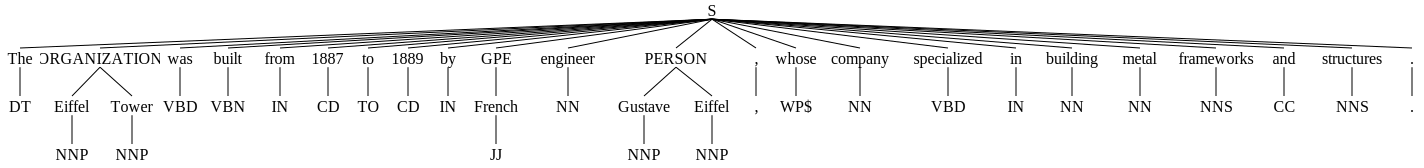

In [59]:
import nltk
nltk.ne_chunk(Tagged_ele)


---
---

# `Bag of Words`

1) Create Vocabulary: List all unique words from the text data.

2) Vector Representation: Each text is represented as a vector, where each position in the vector corresponds to a word in the vocabulary.

3) Word Count: The value in each position is the count of the word in the text.

The Bag-of-Words model is often used as a starting point in text analysis before applying more sophisticated techniques like TF-IDF, Word2Vec, or neural network-based embeddings.

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
documents = ["Gangs of Wasseypur is a great movie.", "The success of a movie depends on the performance of the actors.", "There are no new movies releasing this week."]
print(documents)

['Gangs of Wasseypur is a great movie.', 'The success of a movie depends on the performance of the actors.', 'There are no new movies releasing this week.']


In [63]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

def preprocess(document):
    'changes document to lower case and removes stopwords'

    # change sentence to lower case
    document = document.lower()

    # tokenize into words
    words = word_tokenize(document)

    # remove stop words
    words = [word for word in words if word not in stopwords.words("english")]

    # join words to make sentence
    document = " ".join(words)
    
    return document

documents = [preprocess(document) for document in documents]
print(documents)


['gangs wasseypur great movie .', 'success movie depends performance actors .', 'new movies releasing week .']


[nltk_data] Downloading package punkt to C:\Users\uppada
[nltk_data]     satwik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\uppada
[nltk_data]     satwik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(documents)
print(bow_model.toarray())  # returns the rown and column number of cells which have 1 as value

[[0 0 1 1 1 0 0 0 0 0 1 0]
 [1 1 0 0 1 0 0 1 0 1 0 0]
 [0 0 0 0 0 1 1 0 1 0 0 1]]


In [67]:
print(bow_model.shape)
print(vectorizer.get_feature_names_out())

(3, 12)
['actors' 'depends' 'gangs' 'great' 'movie' 'movies' 'new' 'performance'
 'releasing' 'success' 'wasseypur' 'week']


## Bag of words

In [71]:
import pandas as pd
print("Bag of words")
pd.DataFrame(bow_model.toarray(), columns = vectorizer.get_feature_names_out())

Bag of words


,actors,depends,gangs,great,movie,movies,new,performance,releasing,success,wasseypur,week
0,0,0,1,1,1,0,0,0,0,0,1,0
1,1,1,0,0,1,0,0,1,0,1,0,0
2,0,0,0,0,0,1,1,0,1,0,0,1


**`process`**

word tokenization --> remove stopwords --> initilize countvectorizer --> transform text to numbers --> modify it to array and give colummn name as get_feature_names_out

----
----

# `CANONICALISATION`

### `phonetic hashing`

---

### `EDIT DISTANCE`

#### Levenshtein Edit distance

In [77]:
from nltk.metrics.distance import edit_distance
edit_distance('apple','appel')

2

#### Damerau–Levenshtein distance

In [78]:
edit_distance('apple','appel', transpositions=True)

1

---
---

## <a id='toc3_16_'></a>[`Text Encoding`](#toc0_)

Basically Text encoding is implemented in various ways:
- 1. One-hot encoding 

## <a id='toc3_17_'></a>[`One - Hot Encoding`](#toc0_)

---
One- hot encoding represents each word in the vocabulary as a binary vector where only one bit is set to 1 (hot) and all others are set to 0(cold)

Each word in the vocabulary is assigned a unique index, and the binary vector has the length equal to the size of the vocabulary.

NLTK provides the `nltk.one_hot` function to perform one-hot encoding.
